### Generate Dataset using normal-distribution

In [1]:
# Base Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [52]:
N, D, H, K = 500, 2, 3, 3

In [53]:
X1 = np.random.randn(N, D) + np.array([0, -2])
X2 = np.random.randn(N, D) + np.array([2, 2])
X3 = np.random.randn(N, D) + np.array([-2, 2])

In [54]:
X = np.vstack((X1, X2, X3))

In [55]:
X.shape

(1500, 2)

In [56]:
Y = np.array([0]*500+[1]*500+[2]*500)

In [57]:
Y.shape

(1500,)

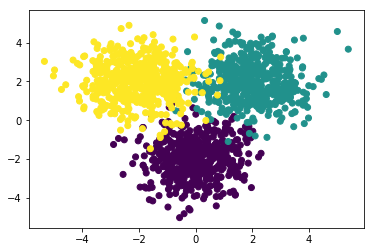

In [58]:
plt.scatter(X[:,0], X[:,1],  c=Y)

In [59]:
W1 = np.random.randn(D, H)
b1 = np.zeros(shape=(1, H))

W2 = np.random.randn(H, K)
b2 = np.zeros(shape=(1, K))

In [62]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [68]:
def errorRate(Y, Yp):
    return np.mean(Y != Yp)

In [72]:
def accuracy(Y, Yp):
    return 1.0 - errorRate(Y, Yp)

In [73]:
def forward(X, W1, b1, W2, b2):
    Xh = np.tanh((X@W1) + b1)
    Yp = softmax((Xh@W2) + b2)
    return Yp

In [74]:
Yp = forward(X, W1, b1, W2, b2)

In [75]:
accuracy(Y, np.argmax(Yp, axis=1))

0.3393333333333334

### e-Commerce Dataset Prediction

In [87]:
def getData():
    df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/ann_logistic_extra/ecommerce_data.csv', header=None, skiprows=1)

    # just in case you're curious what's in it
    # df.head()

    # easier to work with numpy array
    data = df.values

    # shuffle it
    np.random.shuffle(data)

    # split features and labels
    X = data[:,:-1]
    Y = data[:,-1].astype(np.int32)

    # one-hot encode the categorical data
    # create a new matrix X2 with the correct number of columns
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

    # one-hot
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1

    # method 2
    # Z = np.zeros((N, 4))
    # Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
    # # assign: X2[:,-4:] = Z
    # assert(np.abs(X2[:,-4:] - Z).sum() < 1e-10)

    # assign X2 back to X, since we don't need original anymore
    X = X2

    # split train and test
    Xtrain = X[:-100]
    Ytrain = Y[:-100]
    Xtest = X[-100:]
    Ytest = Y[-100:]

    # normalize columns 1 and 2
    for i in (1, 2):
        m = Xtrain[:,i].mean()
        s = Xtrain[:,i].std()
        Xtrain[:,i] = (Xtrain[:,i] - m) / s
        Xtest[:,i] = (Xtest[:,i] - m) / s

    return Xtrain, Ytrain, Xtest, Ytest

In [88]:
Xtrain, Ytrain, Xtest, Ytest = getData()

In [91]:
Ytrain

array([1, 2, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 3, 0, 0, 3, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 3, 2, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0,
       3, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 2, 0, 3, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 1, 2, 3, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1,
       1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0,
       1, 3, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0,
       2, 0, 0, 1, 0, 3, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 2, 0, 3, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1,

In [100]:
D = Xtrain.shape[1]
K = len(set(Ytrain))
H = 5 # setting 5 hidden unit

W1 = np.random.randn(D, H)
b1 = np.zeros(shape=(1, H))

W2 = np.random.randn(H, K)
b2 = np.zeros(shape=(1, K))

print(D, K)

8 4


In [102]:
Yp = forward(Xtrain, W1, b1, W2, b2)

In [103]:
Yp

array([[0.28680071, 0.2354859 , 0.20775543, 0.26995796],
       [0.66978039, 0.03028259, 0.06307411, 0.23686292],
       [0.31549108, 0.21307352, 0.15525632, 0.31617908],
       ...,
       [0.26331342, 0.15087292, 0.31166325, 0.27415041],
       [0.12682074, 0.1803286 , 0.60517943, 0.08767123],
       [0.00588585, 0.13872698, 0.84284775, 0.01253942]])

In [109]:
accuracy(Ytrain, np.argmax(Yp, axis=1))

0.25249999999999995

In [107]:
np.argmax(Yp, axis=1)

array([0, 0, 3, 0, 3, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1,
       3, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 3,
       0, 1, 0, 2, 3, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2,
       0, 2, 0, 0, 1, 2, 3, 2, 2, 0, 0, 2, 3, 0, 0, 2, 0, 2, 0, 3, 0, 0,
       0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 3,
       2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2,
       1, 0, 0, 1, 2, 3, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 3, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 3, 0, 2, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 3, 2, 2, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0,

In [112]:
def S(A):
    return 1.0 / (1.0 + np.exp(-A))

def Sp(A):
    return S(A) * (1-S(A))

In [120]:
x = np.arange(0, 50)

In [121]:
X = S(x)
Y = Sp(x)

X

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [122]:
Y

array([2.50000000e-01, 1.96611933e-01, 1.04993585e-01, 4.51766597e-02,
       1.76627062e-02, 6.64805667e-03, 2.46650929e-03, 9.10221180e-04,
       3.35237671e-04, 1.23379350e-04, 4.53958077e-05, 1.67011429e-05,
       6.14413685e-06, 2.26031919e-06, 8.31527336e-07, 3.05902133e-07,
       1.12535149e-07, 4.13993739e-08, 1.52299793e-08, 5.60279642e-09,
       2.06115369e-09, 7.58256124e-10, 2.78946866e-10, 1.02618802e-10,
       3.77513576e-11, 1.38880019e-11, 5.10902431e-12, 1.87960758e-12,
       6.91446900e-13, 2.54463117e-13, 9.34807787e-14, 3.44169138e-14,
       1.26565425e-14, 4.66293670e-15, 1.77635684e-15, 6.66133815e-16,
       2.22044605e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

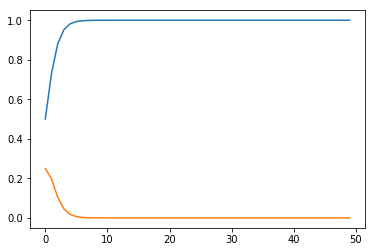

In [124]:
plt.plot(x, S(x))
plt.plot(x, Sp(x))